In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt

plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
RANDOM_STATE = 17

In [2]:
X_train = np.loadtxt("D:\Загрузки браузера\samsung_HAR\samsung_HAR\samsung_train.txt")
y_train = np.loadtxt("D:\Загрузки браузера\samsung_HAR\samsung_HAR\samsung_train_labels.txt").astype(int)

X_test = np.loadtxt("D:\Загрузки браузера\samsung_HAR\samsung_HAR\samsung_test.txt")
y_test = np.loadtxt("D:\Загрузки браузера\samsung_HAR\samsung_HAR\samsung_test_labels.txt").astype(int)

In [3]:
# Проверим размерности
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

In [4]:
# Ваш код здесь
X = np.vstack([X_train, X_test])
y = np.concatenate([y_train, y_test])

In [5]:
print(X.shape)
print(y.shape)

(10299, 561)
(10299,)


In [6]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

In [7]:
n_classes = np.unique(y).size

In [8]:
# Ваш код здесь
scaler = StandardScaler()


In [9]:
X_scaled = scaler.fit_transform(X)

In [10]:
pca = PCA(0.9, random_state=RANDOM_STATE)

In [11]:
X_pca = pca.fit_transform(X_scaled)

In [12]:
pca.n_components_

65

In [13]:
pca.explained_variance_ratio_

array([0.50738221, 0.06239186, 0.02692564, 0.02452871, 0.01888936,
       0.01631395, 0.01414533, 0.01216211, 0.00985248, 0.00949228,
       0.00858304, 0.0080998 , 0.00765863, 0.00676668, 0.00630242,
       0.00615718, 0.00595335, 0.00577195, 0.00563431, 0.0054083 ,
       0.00518828, 0.00502742, 0.00473229, 0.00463818, 0.00446848,
       0.00439868, 0.00416863, 0.00400809, 0.00389072, 0.00381339,
       0.0036687 , 0.00364357, 0.00349225, 0.00346736, 0.00335539,
       0.00329411, 0.00323824, 0.00300508, 0.00294254, 0.00290452,
       0.00275765, 0.00269864, 0.00264196, 0.0025803 , 0.00255031,
       0.00247776, 0.00245537, 0.0023829 , 0.00235902, 0.00232044,
       0.0022836 , 0.00219182, 0.00212631, 0.00209145, 0.0020348 ,
       0.00201167, 0.00198111, 0.00194391, 0.00192509, 0.00189539,
       0.00186403, 0.00182923, 0.00180956, 0.00176364, 0.00174188])

In [14]:
pca = PCA(n_components=2, random_state=RANDOM_STATE)

In [15]:
X_pca = pca.fit_transform(X_scaled)

In [16]:
X_pca.shape

(10299, 2)

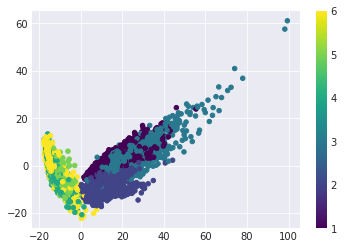

In [17]:
# Ваш код здесь
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, s=20, cmap='viridis')
plt.colorbar()
plt.show();

In [18]:
?KMeans

In [25]:
pca1 = PCA(random_state=17)

In [26]:
X_pca1 = pca1.fit_transform(X_scaled)

In [19]:
k_mean = KMeans(n_clusters=6, n_init=100, random_state=RANDOM_STATE)

In [27]:
k_mean.fit(X_pca1)

D:\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.floa

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=17, tol=0.0001, verbose=0)

In [28]:
cluster_labels = k_mean.labels_

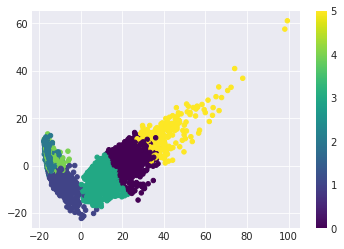

In [29]:
plt.scatter(X_pca1[:,0], X_pca1[:,1], c=cluster_labels, s=20,  cmap='viridis');
plt.colorbar()
plt.show();

In [30]:
tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 
             'спуск по лестнице', 'сидение', 'стояние', 'лежание', 'все']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']
tab

cluster1  cluster2  cluster3  cluster4  cluster5  \
ходьба                         742         0         0       903         0   
подъем вверх по лестнице       295         2         0      1242         0   
спуск по лестнице              889         0         0       321         0   
сидение                          0       451        91         1      1234   
стояние                          0       566         0         0      1340   
лежание                          0       330      1556         5        53   
все                           1926      1349      1647      2472      2627   

                          cluster6    все  
ходьба                          77   1722  
подъем вверх по лестнице         5   1544  
спуск по лестнице              196   1406  
сидение                          0   1777  
стояние                          0   1906  
лежание                          0   1944  
все                            278  10299

In [82]:
for i in range(len(tab)-1):
    print(max(tab.iloc[i,:-2]) / tab.iloc[i,-2])
    tab['rate'][i] = max(tab.iloc[i,:-2]) / tab.iloc[i,-2]

0.524390243902439


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.8044041450777202
0.6322901849217639
0.6944288126055149
0.7030430220356768
0.8004115226337448


In [83]:
tab

cluster1  cluster2  cluster3  cluster4  cluster5  \
ходьба                         742         0         0       903         0   
подъем вверх по лестнице       295         2         0      1242         0   
спуск по лестнице              889         0         0       321         0   
сидение                          0       451        91         1      1234   
стояние                          0       566         0         0      1340   
лежание                          0       330      1556         5        53   
все                           1926      1349      1647      2472      2627   

                          cluster6    все      rate  
ходьба                          77   1722  0.524390  
подъем вверх по лестнице         5   1544  0.804404  
спуск по лестнице              196   1406  0.632290  
сидение                          0   1777  0.694429  
стояние                          0   1906  0.703043  
лежание                          0   1944  0.800412  
все                            278  10299  0.000000

In [91]:
# Ваш код здесь
inertia = []
for k in tqdm_notebook(range(1, n_classes + 1)):
    k_mean = KMeans(n_clusters=k, n_init=100, random_state=RANDOM_STATE)
    k_mean.fit(X_pca1)
    inertia.append(k_mean.inertia_)

D:\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.floa

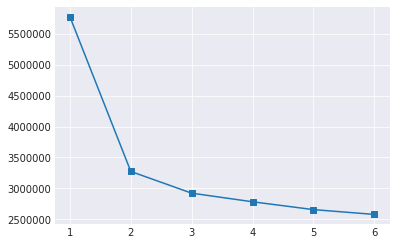

In [102]:
plt.plot(range(1, n_classes + 1), inertia, marker="s")

In [105]:
ag = AgglomerativeClustering(n_clusters=n_classes, 
                             linkage='ward').fit(X_pca1)

In [104]:
ag.labels_

In [239]:
k_mean = KMeans(n_clusters=2, n_init=100, random_state=RANDOM_STATE)
k_mean.fit(X_pca1)

D:\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
D:\anaconda\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.floa

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=17, tol=0.0001, verbose=0)

In [240]:
metrics.adjusted_rand_score(ag.labels_, k_mean.labels_)

D:\anaconda\lib\site-packages\sklearn\metrics\cluster\supervised.py:123: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.4349340559778343

In [233]:
pipe = Pipeline([('scaler', StandardScaler()), ('svm', LinearSVC(random_state=RANDOM_STATE))])

In [130]:
pipe.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=17,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [131]:
pipe.score(X_test, y_test)

0.9636918900576857

In [234]:
svc_params ={'svm__C':[0.001, 0.01, 0.1, 1, 10]}

In [235]:
grid = GridSearchCV(pipe, param_grid=svc_params, cv=3)

In [137]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('svm', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
             intercept_scaling=1, loss='squared_hinge', max_iter=1000,
             multi_class='ovr', penalty='l2', random_state=17, tol=0.0001,
             verbose=0))],
 'verbose': False,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'svm': LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
           intercept_scaling=1, loss='squared_hinge', max_iter=1000,
           multi_class='ovr', penalty='l2', random_state=17, tol=0.0001,
           verbose=0),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'svm__C': 1.0,
 'svm__class_weight': None,
 'svm__dual': True,
 'svm__fit_intercept': True,
 'svm__intercept_scaling': 1,
 'svm__loss': 'squared_hinge',
 'svm__max_iter': 1000,
 'svm__multi_class': 'ovr',
 'svm__penalty': 'l2',
 'svm__random_

In [236]:
grid.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check t

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svm',
                                        LinearSVC(C=1.0, class_weight=None,
                                                  dual=True, fit_intercept=True,
                                                  intercept_scaling=1,
                                                  loss='squared_hinge',
                                                  max_iter=1000,
                                                  multi_class='ovr',
                                                  penalty='l2', random_state=17,
                                                  tol=0.0001, verbose=0))],
      

In [237]:
grid.best_score_

0.9390642002176278

In [144]:
best_svc = grid.best_estimator_

In [223]:
best_svc.score(X_test, y_test)

0.9619952494061758

In [ ]:
best_svc.

In [146]:
grid.best_params_

{'svm__C': 0.1}

In [147]:
y_predicted = grid.predict(X_test)

In [148]:
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 
             'сидение', 'стояние', 'лежание', 'все']
tab.columns = tab.index
tab

ходьба  подъем вверх по лестнице  спуск по лестнице  \
ходьба                       494                         2                  0   
подъем вверх по лестнице      12                       459                  0   
спуск по лестнице              2                         4                412   
сидение                        0                         4                  0   
стояние                        0                         0                  0   
лежание                        0                         0                  0   
все                          508                       469                412   

                          сидение  стояние  лежание   все  
ходьба                          0        0        0   496  
подъем вверх по лестнице        0        0        0   471  
спуск по лестнице               1        1        0   420  
сидение                       427       60        0   491  
стояние                        15      517        0   532  
лежание                         0       11      526   537  
все                           443      589      526  2947

In [188]:
tab.iloc[:, 0]

ходьба                      494
подъем вверх по лестнице     12
спуск по лестнице             2
сидение                       0
стояние                       0
лежание                       0
все                         508
Name: ходьба, dtype: int64

In [162]:
for i in range(len(tab.index)-1):
    print(tab.index[i])
    print(metrics.accuracy_score(y_test[y_test==i+1], y_predicted[y_test==i+1]))

ходьба
0.9959677419354839
подъем вверх по лестнице
0.9745222929936306
спуск по лестнице
0.9809523809523809
сидение
0.869653767820774
стояние
0.9718045112781954
лежание
0.9795158286778398


In [194]:
for i in range(len(tab.index)-1):
    print(tab.index[i])
    print(metrics.recall_score(y_test[y_predicted==i+1], y_predicted[y_predicted==i+1], average='micro'))

ходьба
0.9724409448818898
подъем вверх по лестнице
0.9786780383795309
спуск по лестнице
1.0
сидение
0.963882618510158
стояние
0.8777589134125636
лежание
1.0


###  metrics.classification_report

In [195]:
print(metrics.classification_report(y_test, y_predicted, target_names=tab.index[:6]))

                          precision    recall  f1-score   support

                  ходьба       0.97      1.00      0.98       496
подъем вверх по лестнице       0.98      0.97      0.98       471
       спуск по лестнице       1.00      0.98      0.99       420
                 сидение       0.96      0.87      0.91       491
                 стояние       0.88      0.97      0.92       532
                 лежание       1.00      0.98      0.99       537

                accuracy                           0.96      2947
               macro avg       0.97      0.96      0.96      2947
            weighted avg       0.96      0.96      0.96      2947



In [219]:
pipe_pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA(0.9, random_state=RANDOM_STATE)), ('svm', LinearSVC(random_state=RANDOM_STATE))])

In [224]:
grid = GridSearchCV(pipe_pca, svc_params, cv=3)

In [225]:
grid.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check t

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=0.9, random_state=17,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('svm',
                                        LinearSVC(C=1.0, class_weight=None,
                                                  dual=True, fit_intercept=True,
                                                  intercept_scaling=1,
                                 

In [226]:
grid.score(X_test, y_test)

0.9189005768578216

In [231]:
grid.best_score_

0.9004352557127312

In [210]:
x_pca = pca.fit_transform(X_train)

In [211]:
x_pca.shape

(7352, 34)